# Word to Vector

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

* **The filename needs to be customized. The column name of sequences has to be 'Sequence'.**

In [2]:
# Import sequence data to train the vectors
# Input the dataset for training the vectors
df_vec = pd.read_csv('llps_plus.csv')

In [3]:
def split(a):
    # 3 AA as a 'word'
    li = []
    for i in range(len(a)-2):
        li.append(a[i:i+3])
    return li

def list_of_list(df):
    # Prepare data for genism Word2Vec function
    li = []
    for i in df['Sequence']:
        li.append(split(i))
    return li

def train_model(df):
    # Word to Vector
    dfs = df['Sequence']
    list_ready = list_of_list(df)
    model = Word2Vec(list_ready, min_count=1, vector_size=200, workers=3, window =25, sg = 1)
    return model

In [4]:
model = train_model(df_vec)

# Embed sequences to vectors

* **The filename needs to be customized. The column name of sequences has to be 'Sequence'.**

In [5]:
df_posi = pd.read_csv('llps_plus.csv')
# df_nega = pd.read_csv('pdb30.csv')
# df_nega.columns
# This dataset needs to be cleaned before use

In [6]:
# df_nega = df_nega.rename(columns={'PDB\tUniProt\tseq_len\tseq':'Sequence'})

In [7]:
def to_picture(dfs):
    # Turn a set of sequences into a set of pictures
    dfs = dfs['Sequence']
    dataset = []
    for j in range(len(dfs)):
        sq_split = split(dfs[j])
        sqq = []
        for i in range(len(sq_split)):
            sqq += list(model.wv[sq_split[i]])
        picture = np.array(sqq).reshape((int(len(sqq)/200),200))
        dataset.append(picture)
    return dataset

In [8]:
pictures_posi = to_picture(df_posi)

# Visualize the pictures, though cannot comprehend

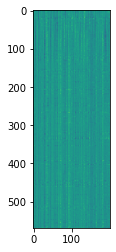

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pictures_posi[0])